# Image augmentation(**optional**)


In [57]:

import os

import matplotlib.pylab as plt
import numpy as np
from tqdm import tqdm

import planktonclas
from planktonclas import paths, config
from planktonclas.data_utils import load_image, load_data_splits, augment, load_class_names ,create_data_splits ,create_data_splits
import numpy as np

import yaml
conf_path = "/srv/phyto-plankton-classification/etc/demo-config.yaml"
with open(conf_path, 'r') as f:
    CONF = yaml.safe_load(f)

CONF = config.get_conf_dict(CONF)


#if not using demo
splits_dir = paths.get_splits_dir()

#if using DEMO
splits_dir="/srv/phyto-plankton-classification/data/demo-dataset_files"



if 'train.txt' not in os.listdir(splits_dir ):
    if not (CONF['dataset']['split_ratios']):
        if (CONF['training']['use_validation']) & (CONF['testing']['use_test']):
            split_ratios=[0.7,0.15,0.15]
        elif (CONF['training']['use_validation']) & (~CONF['testing']['use_test']):
            split_ratios=[0.9,0.1,0]
        else:
            split_ratios=[1,0,0]
    else:
        split_ratios=(CONF['dataset']['split_ratios'])
    create_data_splits(splits_dir=splits_dir,
                                    im_dir=CONF['general']['images_directory'],
                                    split_ratios=split_ratios)
        



# Load the training data
X_train, y_train = load_data_splits(splits_dir=splits_dir,
                                    im_dir=CONF['general']['images_directory'],
                                    split_name='train')




Loading train data...



    Perform data augmentation on some image using the albumentations package.

    Parameters
    ----------
    im : Numpy array
    params : dict or None
        Contains the data augmentation parameters
        Mandatory keys:
        - h_flip ([0,1] float): probability of performing an horizontal left-right mirroring.
        - v_flip ([0,1] float): probability of performing an vertical up-down mirroring.
        - rot ([0,1] float):  probability of performing a rotation to the image.
        - rot_lim (int):  max degrees of rotation.
        - stretch ([0,1] float):  probability of randomly stretching an image.
        - crop ([0,1] float): randomly take an image crop.
        - zoom ([0,1] float): random zoom applied to crop_size.
            --> Therefore the effective crop size at each iteration will be a
                random number between 1 and crop*(1-zoom). For example:
                  * crop=1, zoom=0: no crop of the image
                  * crop=1, zoom=0.1: random 

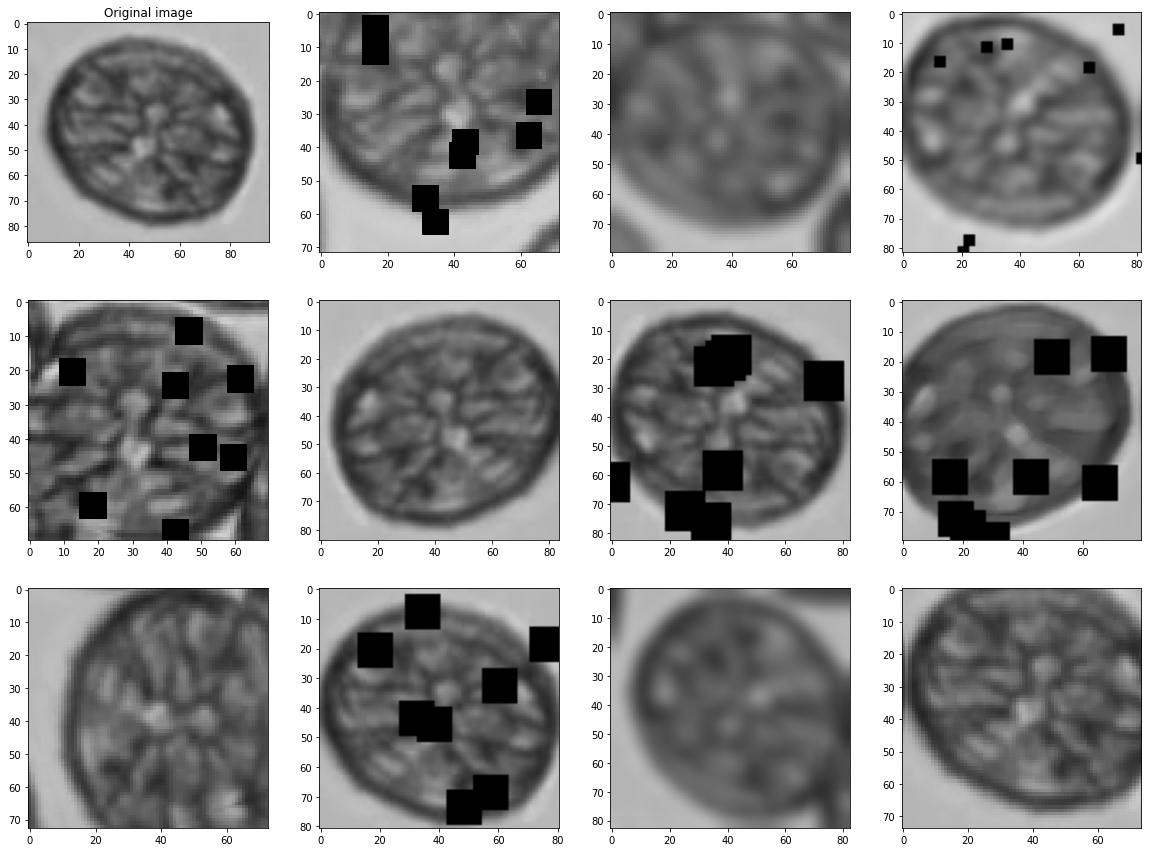

In [58]:
# Select the augmentation type
aug_params = CONF['augmentation']['train_mode'] #you can also try 'test_mode'

# You can also use your custom parameter to try different augmentations
aug_params = {'h_flip': 0.5,
              'v_flip': 0.5,
              'rot': 0.7,
              'rot_lim': 90,
              'stretch': 0.,
              'crop': 1.0,
              'zoom': 0.2,
              'blur': 0.3,
              'pixel_noise': 0.3,
              'pixel_sat': 0.3,
              'cutout': 0.5}

print(augment.__doc__)

fig, axs = plt.subplots(3,4, figsize=(20,15))
axs = axs.flatten()

# Plot original image
img = load_image(X_train[0])
axs[0].imshow(np.array(img).astype(np.uint8))
axs[0].set_title('Original image')

# Plot different examples of data augmentation
for i in range(11):
    img_aug = augment(img, params=aug_params)
    axs[i+1].imshow(np.array(img_aug).astype(np.uint8))